# Python Scripts for the Homework on Numerical Tools

### Homework07- ODE

#### Functions

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def function(x, f, g):
    
    dx2 = 24 * np.cos(4*x) - 16 * f
    return dx2

def rk_2nd_order(function, no_of_steps, upper_limit, lower_limit):
    """ The function returns the second order derivative and the array that stores
        the xpoint, current_f, and current_g for the iterations"""
    
    h = (upper_limit - lower_limit) / (no_of_steps*1.0)
    
    # list to store variables
    current_func = []
    current_gfunc= []
    x_list = []
   
    
    # initial conditions
    initial_func = 0.0
    initial_gfunc = 0.0
    
    step_points = no_of_steps
    
    for step_point in range(1, step_points+1, 1):
        x = lower_limit+h*(step_point-1)
        xi = lower_limit+h*(step_point)
        mid = h/2
        
        # where L and K represents the stepping methods for the first and second ODE
        Lo = h*function(x, initial_func, initial_gfunc)
        Ko = h*initial_gfunc
        
        L1 = h*function(x+mid, initial_func+Ko/2.0, initial_gfunc+Lo/2.0)
        K1 = h*(initial_gfunc + Lo/2.0)
        
        L2 = h*function(x+mid, initial_func+K1/2.0, initial_gfunc+L1/2.0)
        K2 = h*(initial_gfunc + L1/2.0)
        
        L3 = h*function(xi, initial_func+K2, initial_gfunc+L2)
        K3 = h*(initial_gfunc + L2)
        
        current_g = initial_gfunc + (Lo + 2*L1 +2*L2 + L3)/6.0
        current_f = initial_func + (Ko + 2*K1 +2*K2 + K3)/6.0
        
        x_list.append(x)
        current_func.append(current_f)
        current_gfunc.append(current_g)
        
        #update the initial first and second order function
        initial_func = current_f
        initial_gfunc = current_g
        
    # array that stores the information
    x_list = np.array(x_list).reshape(-1, 1)
    current_func = np.array(current_func).reshape(-1, 1)
    current_gfunc = np.array(current_gfunc).reshape(-1, 1)
    
    # combine the arrays together to get a nrow x 3 array
    curr_array = np.hstack((x_list, current_func, current_gfunc))
    
    return initial_func, curr_array

#### Execution of the function

In [31]:
print_rk2 = 1
rk2_prev_func = 0
no_of_steps = 1
upper_limit = 10.0
lower_limit = 0.0

# level of accuracy
eps = 1e-5

# creates an array that saves the array in the function
array = np.ones(3).reshape(-1, 3)

while(print_rk2):
    rk2_curr_func, array = rk_2nd_order(function, no_of_steps, upper_limit, lower_limit)
    error_check = abs(rk2_curr_func - rk2_prev_func)
    
    # Check to see if the level of accuracy is met
    if(error_check < eps):
        print_rk2 = 0
    
    
    print("Runge-Kutta(Number of steps: {}) f(x=5.0) = {:.5f}".format(no_of_steps, rk2_curr_func))
    
    # Increment no_of_steps and Update the eur_prev_func
    no_of_steps = no_of_steps *2
    rk2_prev_func = rk2_curr_func

Runge-Kutta(Number of steps: 1) f(x=5.0) = -159273.53435
Runge-Kutta(Number of steps: 2) f(x=5.0) = -64895130.22226
Runge-Kutta(Number of steps: 4) f(x=5.0) = -3842368396.19548
Runge-Kutta(Number of steps: 8) f(x=5.0) = -86823852883.29097
Runge-Kutta(Number of steps: 16) f(x=5.0) = -1.20419
Runge-Kutta(Number of steps: 32) f(x=5.0) = 17.49245
Runge-Kutta(Number of steps: 64) f(x=5.0) = 22.41065
Runge-Kutta(Number of steps: 128) f(x=5.0) = 22.36976
Runge-Kutta(Number of steps: 256) f(x=5.0) = 22.35478
Runge-Kutta(Number of steps: 512) f(x=5.0) = 22.35349
Runge-Kutta(Number of steps: 1024) f(x=5.0) = 22.35340
Runge-Kutta(Number of steps: 2048) f(x=5.0) = 22.35340


### Save the array containing the xvalue, firstODE, and secondODE

In [20]:
np.savetxt("Second_orderODE.txt", array)
# recall we had to create an initial array of ones

### Plotting the graphs to see the relationship between the first and second order ODE

In [21]:
array

array([[ 0.00000000e+00,  2.86084105e-04,  1.17172599e-01],
       [ 4.88281250e-03,  1.14411816e-03,  2.34255804e-01],
       [ 9.76562500e-03,  2.57344752e-03,  3.51160272e-01],
       ...,
       [ 9.98535156e+00,  2.30951365e+01, -7.40932245e+01],
       [ 9.99023438e+00,  2.27287875e+01, -7.59588451e+01],
       [ 9.99511719e+00,  2.23533952e+01, -7.77972255e+01]])

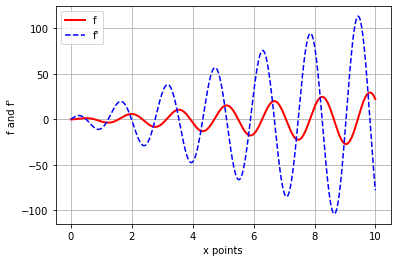

In [33]:
# recall that the array is arranged x_list, f_function, and g_function
plt.plot(array[:,0], array[:, 1], 'r', lw=2, label="f")
plt.plot(array[:,0], array[:, 2], '--b', label="f'")
plt.xlabel('x points')
plt.ylabel("f and f'")
plt.legend()
plt.grid()


# Tools used to debug the assignment

In [ ]:
hstack = np.hstack((xi, yi, zi))

In [ ]:
hstack.shape

In [ ]:
xi.shape

In [ ]:
test = np.empty(3).reshape(-1, 3)
test

In [ ]:
hstack.shape

In [ ]:
test = np.vstack((test, hstack))

In [ ]:
np.append?

In [ ]:
test.shape

In [ ]:
test[1:,]

In [ ]:
np.savetxt('test.txt', test[1:,], header='x y z')